In [141]:
import fnmatch
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [142]:
from subprocess import Popen, PIPE, STDOUT
p = Popen(["go", "run", "main.go"], stdin=PIPE, stdout=PIPE, stderr=STDOUT)
for line in p.stdout:
  print(line)

b'2022/11/12 00:22:39 h = 0.045966\n'
b'2022/11/12 00:22:40 M_1_1 = 13 eps_1_1 = 6.32442 dif_1_1 = 1.52401 \n'
b'2022/11/12 00:22:40 ZV_1_1 took 2.5038ms\n'
b'2022/11/12 00:22:40 M_1_2 = 10 eps_1_2 = 5.93360 dif_1_2 = 1.08816 \n'
b'2022/11/12 00:22:40 ZV_1_2 took 3.9985ms\n'
b'2022/11/12 00:22:40 M_2_1 = 5794 eps_2_1 = 5.88400 dif_2_1 = 4.07183 \n'
b'2022/11/12 00:22:40 ZV_2_1 took 926.9521ms\n'
b'2022/11/12 00:22:41 M_2_2 = 10 eps_2_2 = 5.93400 dif_2_2 = 1.08856 \n'
b'2022/11/12 00:22:41 ZV_2_2 took 16.9902ms\n'


In [143]:
def graph(name: str) -> None:
  f_case = open(name)
  data_case = json.load(f_case)
  x_axis = np.array(data_case['XAXIS'])
  fy_axis = np.array(data_case['YAXIS'])
  N = data_case['N']
  M = data_case['M']
  r = data_case['R']
  phi = data_case['PHI']
  eps = data_case['EPS']
  delta = data_case['DELTA']
  plt.figure(figsize=(10, 8))
  plt.rcParams["font.family"] = "serif"
  plt.rcParams["font.serif"] = ["Times New Roman"]
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(x_axis, fy_axis, color='g', label='f(x)', lw=2, fillstyle='none')#f(x)
  font = {
    'size': 20
  }
  plt.figtext(
    0,
    1,
    f"N: {N}\n"
    f"eps: {eps}\n"
    f"diff: {data_case['DIFF']}\n"
    f"M: {M}\n"
    f"delta: {delta}\n"
    f"{name}",
    fontdict=font
  )
  cx_axis = [[]*(N+1) for i in range(N+1)] #точки
  cy_axis = [[]*(N+1) for i in range(N+1)]

  for j in range (N+1):
    cy_axis[j] = np.arange(r[j],r[j]+delta, delta+1)
    for x in cy_axis[j]:
      cx_axis[j].append(phi[j])
  for j in range(N):
    plt.plot(cx_axis[j], cy_axis[j], color='r', lw=5, fillstyle='full', marker='o')
  plt.legend()
  plt.show()

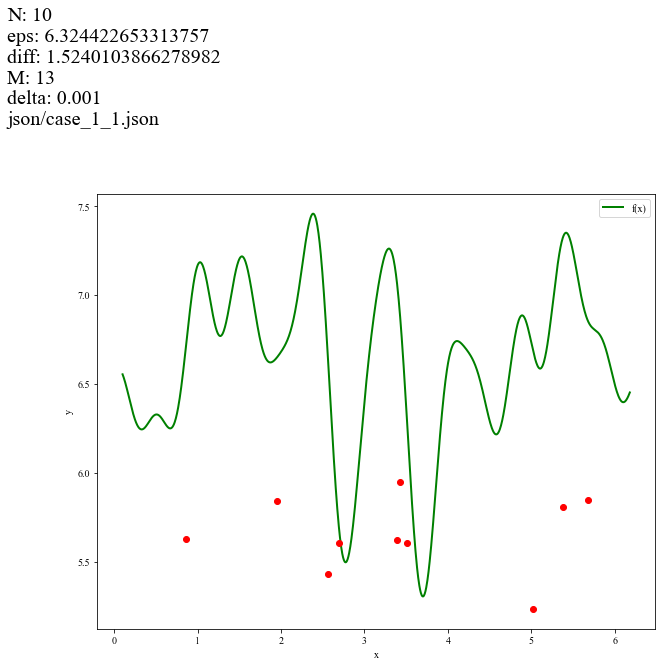

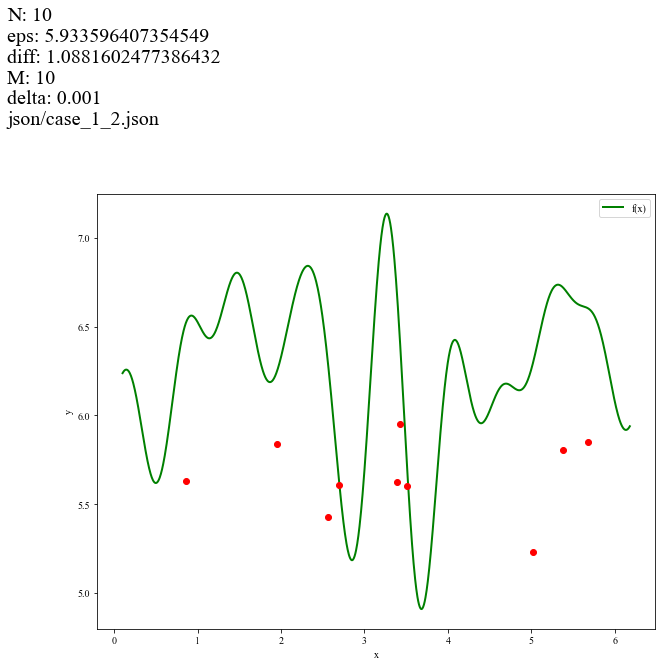

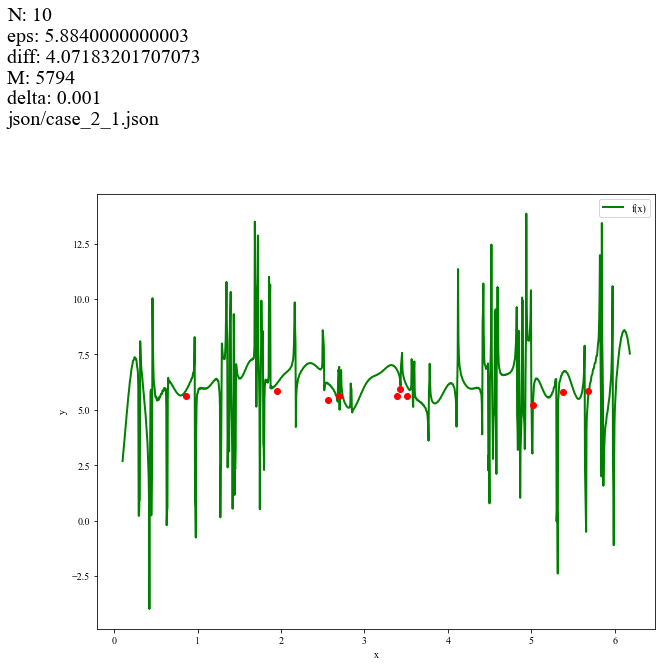

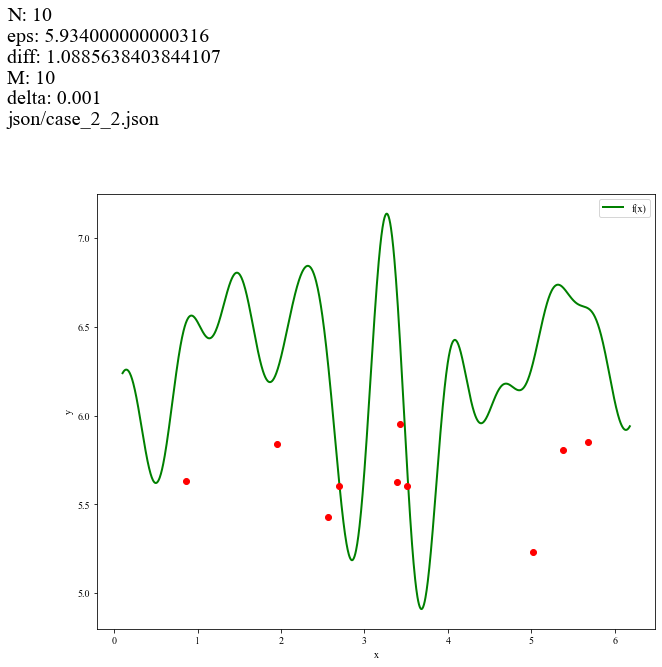

In [144]:
jsons = [f for f in os.listdir("json/") if fnmatch.fnmatch(f, '*.json')]
jsons.sort()
for i in range(len(jsons)):
  graph(f"json/{jsons[i]}")

In [145]:
for i in range(len(jsons)):
  os.remove(f"json/{jsons[i]}")